# Multi-Class Prediction of Cirrhosis Outcomes
Playground Series - Season 3, Episode 26<br>
<https://www.kaggle.com/competitions/playground-series-s3e26/overview><br>
<https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction>

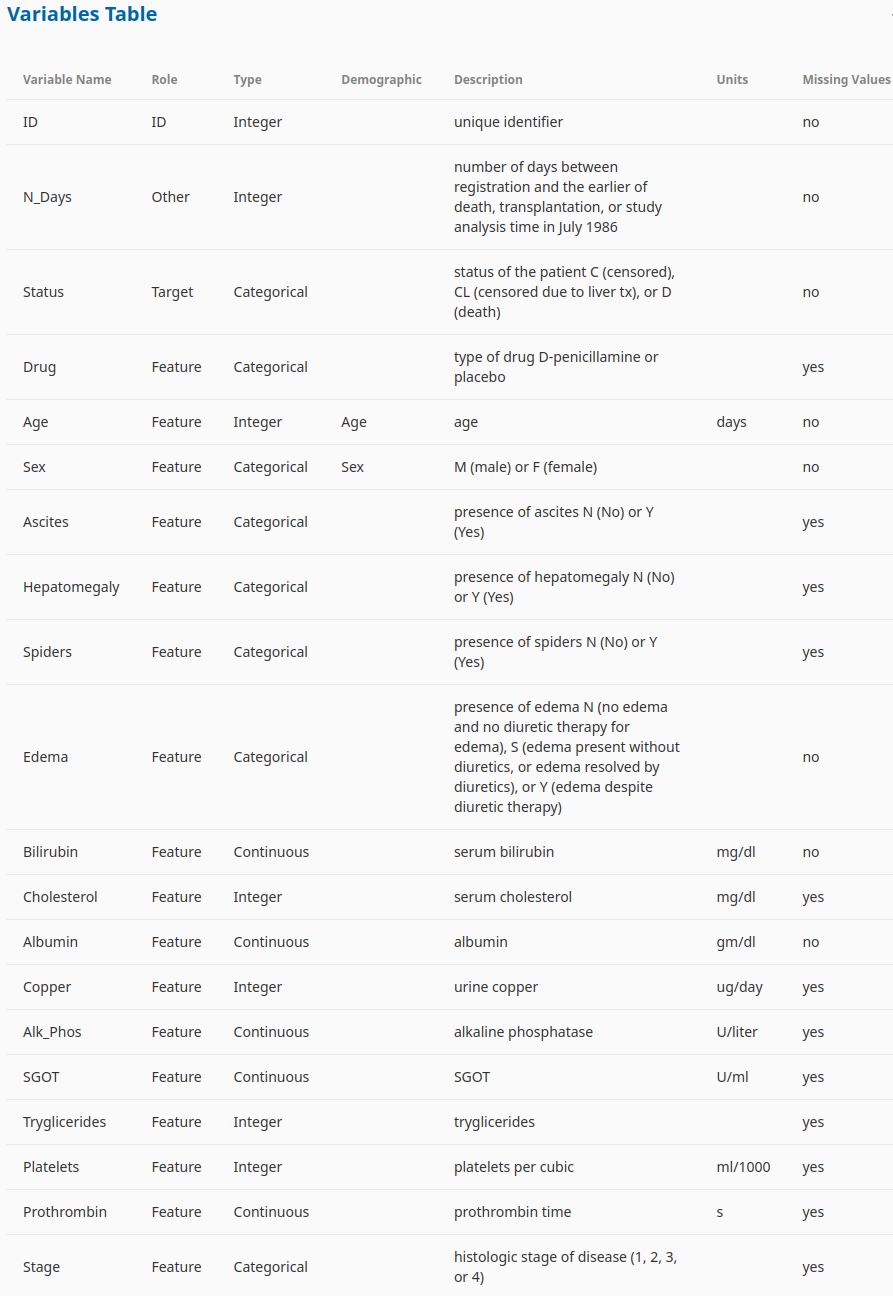

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('dataset/train.csv')
df = df.drop('id', axis=1)

In [29]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status  

In [31]:
categorical_variables = df.drop('Status', axis=1).select_dtypes(include='O').columns.to_list() + ['Stage']
categorical_variables

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

Although `Stage` is of float64 type, it is a categorical variable and should be included among the categorical variables list.

In [32]:
numerical_variables = df.drop('Status', axis=1).select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_variables.remove('Stage')
numerical_variables

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [33]:
y = df['Status']

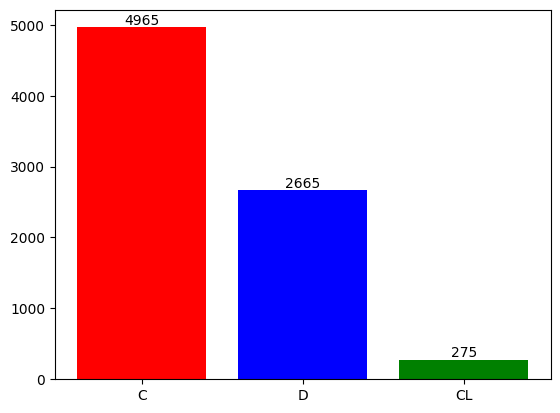

In [34]:
def y_plot(y):
    value_counts = y.value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()
    fig, ax = plt.subplots()
    bars = ax.bar(labels, values, color=['red', 'blue', 'green'])
    ax.bar_label(bars)

y_plot(y)

Classes aren't well balanced in the dataset.

#### Analysis of categorical variables

In [35]:
def df_cat_analysis(df, var):
    print('Value counts in percentage (%):')
    print(df[var].value_counts()/len(df)*100) # in percentage)
    print('')
    print('Crosstab:')
    print(pd.crosstab(df[var], df['Status'], normalize='index')*100)

##### Drug

In [36]:
df_cat_analysis(df, 'Drug')

Value counts in percentage (%):
Drug
Placebo            50.727388
D-penicillamine    49.272612
Name: count, dtype: float64

Crosstab:
Status                   C        CL          D
Drug                                           
D-penicillamine  61.745828  3.876765  34.377407
Placebo          63.840399  3.092269  33.067332


The drug type do not seem to affect the outcome.

##### Sex

In [37]:
df_cat_analysis(df, 'Sex')

Value counts in percentage (%):
Sex
F    92.802024
M     7.197976
Name: count, dtype: float64

Crosstab:
Status          C        CL          D
Sex                                   
F       64.544711  3.421483  32.033806
M       40.421793  4.217926  55.360281


Do men die more?

##### Ascites

In [38]:
df_cat_analysis(df, 'Ascites')

Value counts in percentage (%):
Ascites
N    95.192916
Y     4.807084
Name: count, dtype: float64

Crosstab:
Status           C        CL          D
Ascites                                
N        65.647841  3.574751  30.777409
Y         6.578947  1.578947  91.842105


Ascites looks like a great predictor. Its presence equals almost certain death (91% of the cases).

##### Hepatomegaly

In [39]:
df_cat_analysis(df, 'Hepatomegaly')

Value counts in percentage (%):
Hepatomegaly
Y    51.132195
N    48.867805
Name: count, dtype: float64

Crosstab:
Status                C        CL          D
Hepatomegaly                                
N             82.164121  2.821641  15.014238
Y             44.309748  4.106878  51.583375


Having Hepatomegaly increases chances of death.

##### Spiders

In [40]:
df_cat_analysis(df, 'Spiders')

Value counts in percentage (%):
Spiders
N    75.471221
Y    24.528779
Name: count, dtype: float64

Crosstab:
Status           C        CL          D
Spiders                                
N        71.605766  3.234998  25.159236
Y        35.740072  4.228984  60.030944


Having spiders increases chances of death.

##### Edema

In [41]:
df_cat_analysis(df, 'Edema')

Value counts in percentage (%):
Edema
N    90.588235
S     5.047438
Y     4.364326
Name: count, dtype: float64

Crosstab:
Status          C        CL          D
Edema                                 
N       67.686077  3.588884  28.725038
S       27.568922  4.010025  68.421053
Y        2.318841  0.579710  97.101449


Having Edema despite diuretic therapy is certain death.

##### Stage

In [42]:
df_cat_analysis(df, 'Stage')

Value counts in percentage (%):
Stage
3.0    39.886148
4.0    34.193548
2.0    20.898166
1.0     5.022138
Name: count, dtype: float64

Crosstab:
Status          C        CL          D
Stage                                 
1.0     88.413098  1.763224   9.823678
2.0     78.268765  2.845036  18.886199
3.0     72.882969  3.583888  23.533143
4.0     37.846837  3.995560  58.157603


Stage is the variable for the histologic stage of the disease. There is a clear increase of the death rate going from Stage 1 to 4.

#### Analysis of Numerical Variables
- Histogram
- Boxplot

##### Histogram

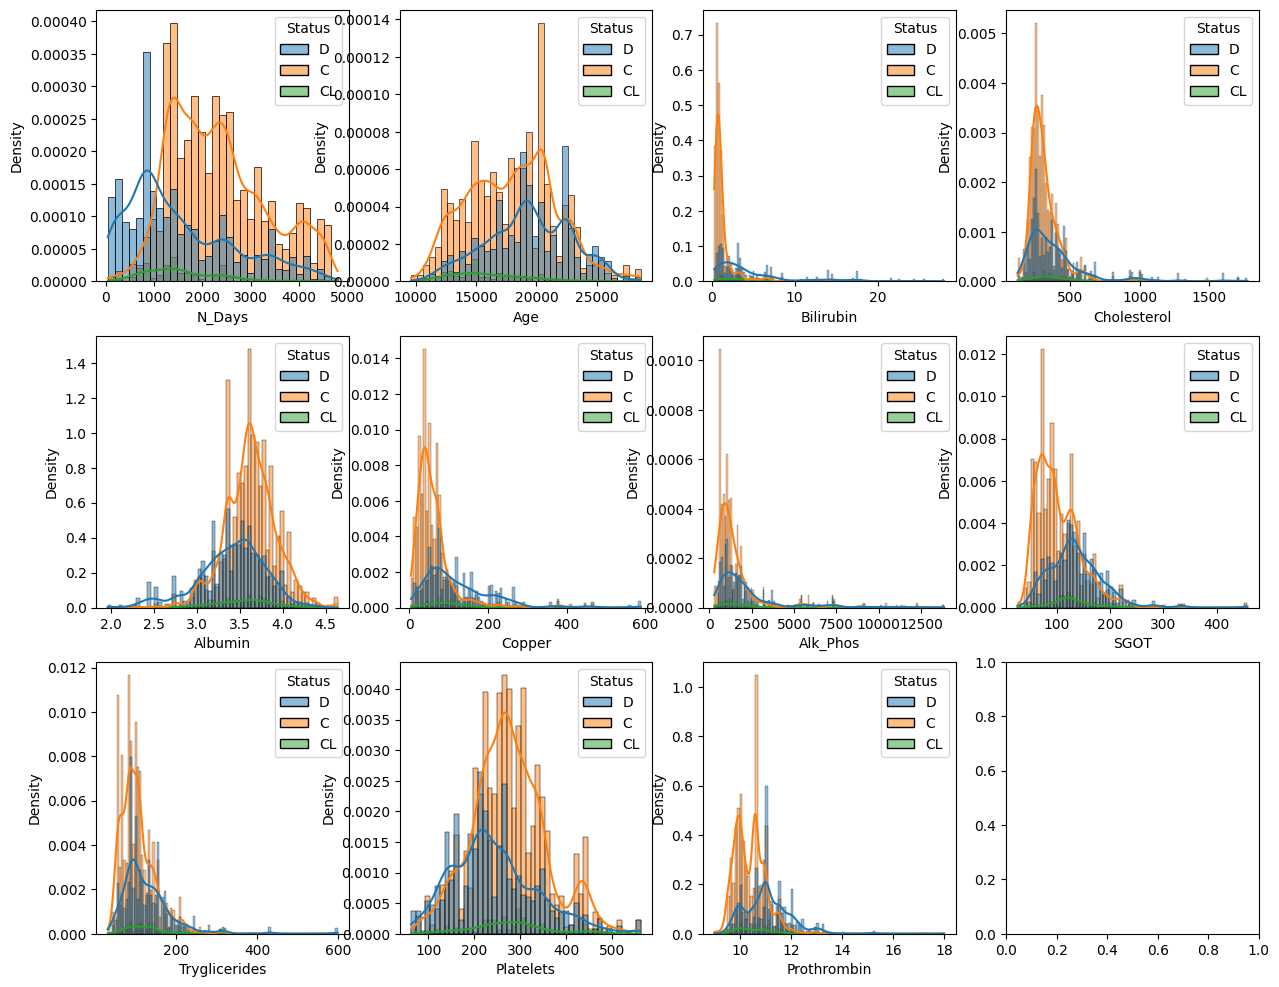

In [43]:
fig, ax = plt.subplots(3,4, figsize=(15,12))
row = 0
col = 0
count = 0
for var in numerical_variables:
    sns.histplot(df, x=var, ax=ax[row, col], hue="Status", kde=True, stat='density')
    count += 1
    col = count % 4
    row = int(count / 4)

Using Histograms like these isn't effective for comparison between the categories because the number of occurrences of each category in the dataset is not uniform. I need a better way of comparing distributions. How can I draw normal curves?

##### Boxplot

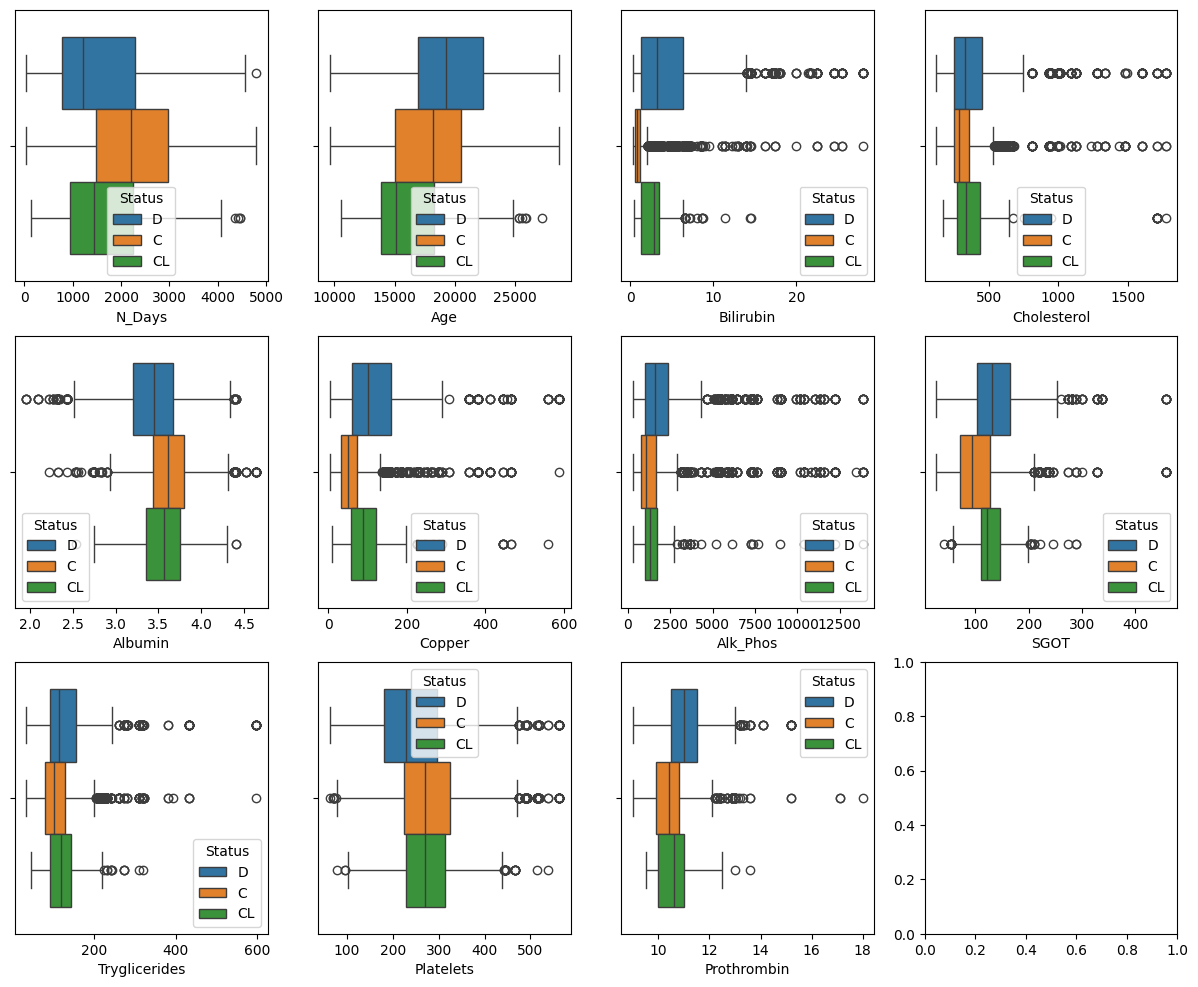

In [44]:
fig, ax = plt.subplots(3,4, figsize=(15,12))
row = 0
col = 0
count = 0
for var in numerical_variables:
    sns.boxplot(df, x=var, ax=ax[row, col], hue="Status")
    count += 1
    col = count % 4
    row = int(count / 4)

Boxplot does a better job showing right away, visually, the difference between the values of the numeric variables grouped by the category of the dependent variable `Status`. 

- Looking at `N_Days`, seems like who will die, will die sooner than who gets censored. But how should censored be interpreted? Does it mean necessarily that the patient survided? It does not seem so. `N_Days` does not seem like a great variable anyways, since a patient could be registered in different states. For instance, someone could be registered almost dying, while others can detect the problem in a earlier stage. And that takes me to this question: when were the patients measured for the variables in the dataset? Right in the beginning? Right in the end?
- `Age` is a risk factor, the higher the age of the patient, the bigger the chance of decease.
- `Bilirubin`, `Copper`, `SGOT` seem relevant to distinct between C and D categories. Not sure about the other categories.

##### Age

In [45]:
df.groupby('Status')['Age'].mean()/365.25 # Age in years just to have a better understanding of how old are the patients

Status
C     49.198548
CL    44.436961
D     52.965755
Name: Age, dtype: float64

In [46]:
df.groupby('Status')['Age'].std()/365.25 # Age in years just to have a better understanding of how old are the patients

Status
C     10.014252
CL     9.065499
D      9.640299
Name: Age, dtype: float64

#### Models

Test the performance of the following models without worrying too much about the hyperparameters:
- Logistic Regression
- SVC
- Random Forest Classifier
- SGD Classifier
- Neural Network

TODO:
* Question to myself: which models are stochastic? I think that Logistic Regression does not need a random_state.
* It is really key to understand better the models, I must set a time to review and study in details all the models

##### Base Pipeline
- OneHotEncoder
- StandardScaler

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [48]:
# Transform data back to a Pandas DataFrame and define column names
class RecreateDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, variables_list):
        self.variables_list = variables_list
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(X, columns=self.variables_list)

In [49]:
ct = ColumnTransformer([('cat', OneHotEncoder(), categorical_variables),
                        ('num', StandardScaler(), numerical_variables)], remainder='passthrough')

df_trans = ct.fit_transform(df)
print(f'df.shape: {df.shape}')
print(f'df_trans.shape: {df_trans.shape}')
df_trans[0,:]

df.shape: (7905, 19)
df_trans.shape: (7905, 29)


array([1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, -0.9424298445204855, 0.8584480302161265,
       -0.07723739735990423, -0.17690769361377204, -0.5729400619892687,
       1.1607849626703868, -0.11333359042237394, 1.3363037355879424,
       -0.9964415582241968, 1.4723412211229452, -1.1890491880288931, 'D'],
      dtype=object)

In [50]:
variables_list = ct.get_feature_names_out().tolist()
pipeline = Pipeline([('column_transformer', ct),
                     ('dataframe', RecreateDataFrame(variables_list))])

df_trans = pipeline.fit_transform(df)
df_trans

,cat__Drug_D-penicillamine,cat__Drug_Placebo,cat__Sex_F,cat__Sex_M,cat__Ascites_N,cat__Ascites_Y,cat__Hepatomegaly_N,cat__Hepatomegaly_Y,cat__Spiders_N,cat__Spiders_Y,...,num__Bilirubin,num__Cholesterol,num__Albumin,num__Copper,num__Alk_Phos,num__SGOT,num__Tryglicerides,num__Platelets,num__Prothrombin,remainder__Status
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,-0.077237,-0.176908,-0.57294,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,D
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,-0.444429,0.068784,-0.024043,-0.27542,-0.197909,0.414968,-0.520497,1.095026,0.474024,C
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,D
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.88761,-0.368194,0.043117,0.090238,C
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,-0.391973,-0.023351,0.293739,-0.27542,-0.333965,0.224347,-0.368194,0.374697,-0.037691,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,-0.470657,-0.212738,0.033735,-0.604825,-0.098625,-0.728759,2.068644,0.900652,-0.933192,C
7901,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,-0.444429,-0.463548,-0.341826,-0.288596,-0.197909,0.561521,-0.710875,0.134588,-0.805263,C
7902,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,-0.155921,-0.642698,-1.035169,-0.433534,-0.464242,-0.91938,-1.015479,-0.745814,2.648812,D
7903,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,-0.496885,-0.524971,-2.306298,-0.683882,-0.42747,-1.173542,0.050637,-0.505705,-0.037691,D


##### Random Forest Classifier 

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss

In [52]:
y = df_trans['remainder__Status']
X = df_trans.drop('remainder__Status', axis=1)

random_forest_classifier = RandomForestClassifier(random_state=123)
y_proba = cross_val_predict(random_forest_classifier, X, y, cv=10, method='predict_proba') 

In [53]:
# Checking what is the order of the values of the predicted variable for the classifier
random_forest_classifier.fit(X, y)
random_forest_classifier.classes_

array(['C', 'CL', 'D'], dtype=object)

The order of the classes is `['C', 'CL', 'D']`

In [54]:
log_loss(y, y_proba, labels=['C', 'CL', 'D'])

0.5245551820892327

##### SGD Classifier

In [55]:
from sklearn.linear_model import SGDClassifier

In [56]:
y = df_trans['remainder__Status']
X = df_trans.drop('remainder__Status', axis=1)

sgd_classifier = SGDClassifier(random_state=123, loss='log_loss')
y_proba = cross_val_predict(sgd_classifier, X, y, cv=10, method='predict_proba') 

In [57]:
log_loss(y, y_proba, labels=['C', 'CL', 'D'])

0.5442095358357701

##### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
y = df_trans['remainder__Status']
X = df_trans.drop('remainder__Status', axis=1)

logistic_regression = LogisticRegression(random_state=123, multi_class='multinomial', solver='newton-cg') # the default solver lbfgs did not converge
y_proba = cross_val_predict(logistic_regression, X, y, cv=10, method='predict_proba')

In [60]:
log_loss(y, y_proba, labels=['C', 'CL', 'D'])

0.5244820751348148

##### SVC

In [61]:
from sklearn.svm import SVC

In [62]:
y = df_trans['remainder__Status']
X = df_trans.drop('remainder__Status', axis=1)

svm = SVC(random_state=123, probability=True)
y_proba = cross_val_predict(svm, X, y, cv=10, method='predict_proba')

In [63]:
log_loss(y, y_proba, labels=['C', 'CL', 'D'])

0.5121312881710671

##### Neural Network

In [64]:
from sklearn.neural_network import MLPClassifier

In [74]:
y = df_trans['remainder__Status']
X = df_trans.drop('remainder__Status', axis=1)

neural_network = MLPClassifier(random_state=123, max_iter=1000, solver='sgd')    
y_proba = cross_val_predict(neural_network, X, y, cv=10, method='predict_proba')

In [75]:
log_loss(y, y_proba, labels=['C', 'CL', 'D'])

0.4902046942884657